<a href="https://colab.research.google.com/github/blacktruth513/Beijing_House-Price_Prediction-Regression_Analysis/blob/main/Beijing_House_Price_Prediction_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ruiqurm/lianjia
#!ls
!unzip lianjia.zip 

Saving kaggle.json to kaggle.json
 72% 9.00M/12.4M [00:00<00:00, 16.8MB/s]
100% 12.4M/12.4M [00:00<00:00, 23.1MB/s]
Archive:  lianjia.zip
  inflating: new.csv                 


 <img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# Section2 Project

---

#<center> **<머신러닝 기반 중국 베이징 주택 가격 예측 프로젝트>** </center>

---
<br>

##- 프로젝트 순서 - 
<br>

1.  프로젝트 주제  
<br>

2. 데이터 선정 이유 및 데이터 소개 / 프로젝트 문제 정의 
<br>

3. 데이터 전처리 및 정제
<br>

4. 데이터 통계분석 
<br>

5. 타겟변수 및 베이스라인 모델 선정
<br>

6. 데이터 모델링 및 모델 해석
<br>

7. 최종 모델 선정 및 결론 도출 
<br>
<br>
<br>






##1 프로젝트 주제

- 주어진 데이터를 사용하여 머신러닝 모델을 기반으로 중국 베이징의 주택 가격을 예측한다.  


<br>
<br>

## 2 데이터 선정 이유 및 데이터 소개 / 프로젝트 문제 정의
<br>
 <img src='https://imgur.com/CxTKWWn.png' width = '300'>
<br>

 - 리엔지아 플랫폼 기반 중국 베이징의 2011년부터 2017년까지의 약 30만 개의 값을 포함하는 주택 데이터를 사용하여 주택 가격을 예측하면서 지금까지 배운 머신러닝 내용을 적용하여 중국과 관련된  도메인 지식 확장을 추구하고자 한다. 
<br>

<문제 정의> 타겟변수인 주택 가격에 어떠한 변수가 큰 영향력을 행사하는 독립 변수를 도출하며 이를 위한 머신러닝 회귀 분석을 적용하고자 한다.  
<br>
<br>
- 链家网是集房源信息搜索、产品研发、大数据处理、服务标准建立为一体的以数据驱动的全价值链房产服务平台。主营：二手房、租房、新房。您可通过小区找房，链家App等找房。 <br> 
:  "리엔지아"는 한국의 다방, 직방과 같은 중국의 대표적인 판매·임대·분양용 주택 부동산 공급 플랫폼으로 주요 영업(판매) 상품은 중고 주택, 새 주택, 렌트 등이 있다.
<br>
- 문제 정의 : 데이터의 학습을 통해 주택 가격을 예측하는 점에서 '타겟 변수'의 회귀모델 적용으로 프로젝트를 진행하고자 한다. 

<br>

### - 데이터 컨텐츠

- url: the url which fetches the data
-id: the id of transaction
-Lng: and Lat coordinates, using the BD09 protocol.
-Cid: community id
-tradeTime: the time of transaction
-DOM: active days on market.Know more in https://en.wikipedia.org/wiki/ / Days_on_market / 부동산이 매물로 시장에 나와 있는 기간
-followers: the number of people follow the transaction. / 거래 참여자 수
-totalPrice: the total price
-price: the average price by square
-square: the square of house
-livingRoom: the number of living room
-drawingRoom: the number of drawing room
-kitchen: the number of kitchen
-bathroom the number of bathroom
-floor: the height of the house. I will turn the Chinese characters to English in the next version.
-buildingType: including tower( 1 ) , bungalow( 2 )，combination of plate and tower( 3 ), plate( 4 ). / 범주형 
-constructionTime: the time of construction
-renovationCondition: including other( 1 ), rough( 2 ),Simplicity( 3 ), hardcover( 4 ) / 범주형
-buildingStructure: including unknow( 1 ), mixed( 2 ), brick and wood( 3 ), brick and concrete( 4 ),steel( 5 ) and steel-concrete composite ( 6 ). / 범주형
-ladderRatio: the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average.
-elevator have ( 1 ) or not have elevator( 0 ) / 범주형
-fiveYearsProperty: It's related to China restricted purchase of houses policy / 범주형
-  Community average price / 지역 주택 평단가 가격



In [ ]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

In [ ]:
import warnings 
warnings.filterwarnings(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3 데이터 전처리 및 정제
- 주요 전처리 내용 : 불필요 변수 제거, 데이터에 포함되어 있는 한자 제거, 화폐 단위 통일 (타겟 변수, 사회 평단가 > 단위 / 1만 위안), 데이터의 이상값 제거 등 10개의 전처리 실시

In [ ]:
df = pd.read_csv('./new.csv', encoding = 'GB2312',low_memory=False)  #GB/T 2312-1980 is a key official character set of the People's Republic of China, used for Simplified Chinese characters.
df

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,高 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,高 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,中 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,底 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,中 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,https://bj.lianjia.com/chengjiao/BJYZ92311192....,BJYZ92311192,116.546899,39.755236,1111027377053,2016-06-10,1.0,8,350.0,20580,170.07,3,2,1,2,中 5,4.0,2003,1,6,0.333,0.0,1.0,0.0,3,36545.0
318847,https://bj.lianjia.com/chengjiao/BJYZ92320171....,BJYZ92320171,116.497474,39.810115,1111027377957,2016-06-10,NaN,1,108.8,31006,35.09,1,0,1,1,中 24,1.0,2009,1,6,0.222,1.0,0.0,1.0,3,54282.0
318848,https://bj.lianjia.com/chengjiao/BJYZ92324217....,BJYZ92324217,116.497256,39.804081,1111027380056,2016-06-05,1.0,2,359.0,35138,102.17,2,2,1,2,中 7,4.0,2000,3,6,0.500,1.0,1.0,0.0,3,46927.0
318849,https://bj.lianjia.com/chengjiao/BJYZ92333313....,BJYZ92333313,116.501794,39.799347,1111027377054,2016-06-12,NaN,4,720.0,40373,178.34,4,2,1,2,中 5,4.0,2003,4,2,0.500,0.0,1.0,0.0,3,54842.0


In [ ]:
# 데이터 결측값 확인
df.isnull().sum()

url                         0
id                          0
Lng                         0
Lat                         0
Cid                         0
tradeTime                   0
DOM                    157977
followers                   0
totalPrice                  0
price                       0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
buildingType             2021
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                    0
communityAverage          463
dtype: int64

### 데이터에 포함되어 있는 이상값 확인 

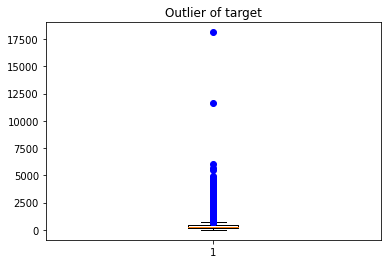

In [ ]:
#이상값 확인
plt.title('Outlier of target')
plt.boxplot(df['totalPrice'], sym='bo')
plt.show()

### - 타겟 변수 분포 시각화

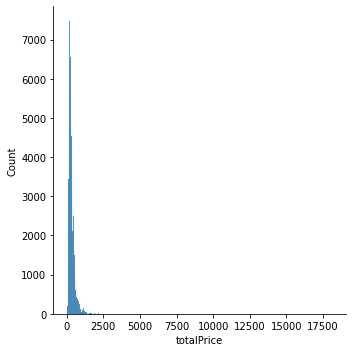

In [ ]:
# 타겟변수 분포도 확인 시각화
sns.displot(df['totalPrice']); #타겟 변수 / 분포가 왼쪽으로 편중되어 있다. 

### - 데이터셋 전처리

In [ ]:
import datetime as dt

In [ ]:
################################################# 데이터 전처리 ####################################################### 

# 1) 변수에 포함되어 있는 한자 등 특수 문자 제거 ex) (高 ，中， 底 : 주택의 높이를 나타내는 한자)
df['floor'] = df['floor'].replace(r'[^0-9a-zA-Z ]', '', regex=True).replace("'", '') # 정규식 활용

# 2) 알 수 없는 관측치 제거  
#df['constructionTime'].value_counts() # 약 19,000개의 건축 연도를 알 수 없는 데이터 값이 있다. 데이터 수를 고려했을 때, 이 값들을 제거해도 된다고 판단 
df = df[~df['constructionTime'].isin(['未知'])]

# 3) 컬럼에 포함되어 있는 결측값을 적절한 값 대체(DOM 컬럼에 대하여)
# Days_on_market(DOM)란, 부동산이 매물로 시장에 나와 있는 기간(단위 / 일)로서, 본 데이터에 포함되어 있는 해당 컬럼의 결측치가 약 15만개(데이터 절반)에 달해 이 값을 중위값으로 대체하여 연구에 사용할 수 있도록 했다.
df['DOM'].fillna(df['DOM'].median(),inplace=True) 

# 4) 결측치 제거 / 나머지 컬럼의 결측값이 비교적 적으므로 영향이 적다고 판단하여 결측치를 제거
df = df.dropna(axis=0, how='any')

# 4-1) 날짜 컬럼 정리 (연도만 사용)
def tradeTimeMod(x):
    return x[0:4]

df['tradeTime'] = df['tradeTime'].apply(tradeTimeMod)

# 5) object형 자료형을 가진 컬럼에 대해 int형으로 형변환
#df['tradeTime'] = df['tradeTime'].astype('int64')
df['livingRoom'] = df['livingRoom'].astype('int64')
df['drawingRoom']= df['drawingRoom'].astype('int64')
df['bathRoom']= df['bathRoom'].astype('int64')
df['floor']= df['floor'].astype('int64')

# 6) int형 자료형을 가진 컬럼에 대해 범주형으로 형변환
df['buildingType']= df['buildingType'].astype(object) 
df['renovationCondition']= df['renovationCondition'].astype(object) 
df['buildingStructure ']= df['buildingStructure'].astype(object)
df['elevator']= df['elevator'].astype(object)
df['fiveYearsProperty']= df['fiveYearsProperty'].astype(object)
df['subway']= df['subway'].astype(object)
df['district']= df['district'].astype(object)

# 7) 거래날짜 별 데이터 순차 정렬
df = df.sort_values(by=['tradeTime'] ,ascending=True).reset_index()
df.drop('index', axis=1, inplace=True)

# 8) 분석에 영향력이 없다고 생각하는 변수 제거
df.drop(['url', 'id', 'Lng', 'Lat', 'Cid', 'price'], axis=1, inplace=True)

# 9) 화폐 단위 통일 (단위 가격 : 1만 위안, 예: totalPrice가 152.5면 1만배를 한 1,520,000 위안이 총 가격이다.)
df['communityAverage'] = (df['communityAverage'] * 0.0001)

# 10) 이상값 제거 
#타겟 변수 이상값 제거
df['totalPrice'] = df[df['totalPrice'] < np.percentile(df['totalPrice'], 99)]['totalPrice']
# # 특성 변수 이상값 제거(0.05% 극단값)
# df['price'] = df[df['price'] < np.percentile(df['price'], 99.5)]['price']
# df['square'] = df[df['square'] < np.percentile(df['square'], 99.5)]['square']
# df['communityAverage'] = df[df['communityAverage'] < np.percentile(df['communityAverage'], 99.5)]['communityAverage']

# 거래날짜와 건축연도가 불일치하는 행 제거 
df = df.drop(df.index[0:4])

df = df.dropna(axis=0, how='any').reset_index()
df.drop('index', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
df

,tradeTime,DOM,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,buildingStructure
0,2009,7.0,0,150.0,55.63,2,1,1,1,6,4,1992,1,2,0.250,0,1,0,10,7.7781,2
1,2010,1.0,0,97.0,62.63,2,1,0,1,14,3,2006,3,6,0.125,1,0,0,12,3.9492,6
2,2010,1.0,0,79.0,45.32,1,1,0,1,14,3,2006,4,6,0.125,1,0,0,12,3.9492,6
3,2010,1.0,0,83.6,64.02,2,1,0,1,6,4,1990,3,2,0.333,0,0,0,12,3.9381,2
4,2010,1.0,0,153.0,91.39,2,1,0,1,6,4,2003,4,2,0.500,0,0,0,12,3.6923,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294711,2018,86.0,97,510.0,108.72,2,1,1,1,25,1,2004,4,6,0.300,1,1,1,7,4.6667,6
294712,2018,240.0,54,518.0,118.58,3,1,1,1,6,4,2006,3,2,0.500,0,1,1,6,4.3641,2
294713,2018,23.0,49,415.5,40.50,1,1,1,1,20,1,1992,3,2,0.200,1,1,1,10,9.8860,2
294714,2018,45.0,159,282.0,81.83,2,1,1,1,6,4,2003,4,2,0.500,0,1,0,6,3.6090,2


In [ ]:
#완료된 정제 데이터 
df.isnull().sum()

tradeTime              0
DOM                    0
followers              0
totalPrice             0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
floor                  0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
buildingStructure      0
dtype: int64

### - 타겟변수 분포 확인   





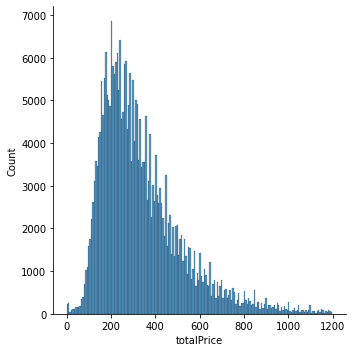

In [ ]:
# 주요변수 분포도 확인 시각화
sns.displot(df['totalPrice']); #타겟 변수

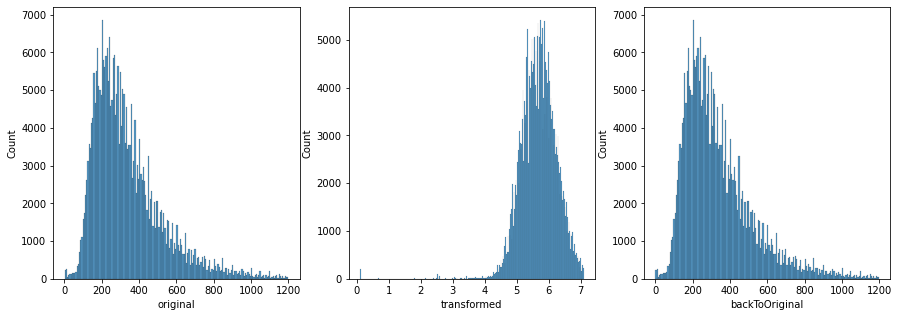

In [ ]:
#로그변환을 통한 타겟변수 정규분포화
plots=pd.DataFrame()
plots['original']=df['totalPrice']
plots['transformed']=np.log1p(df['totalPrice'])
plots['backToOriginal']=np.expm1(np.log1p(df['totalPrice']))

fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(plots['original'], ax=ax[0]);
sns.histplot(plots['transformed'], ax=ax[1]);
sns.histplot(plots['backToOriginal'], ax=ax[2]);

- 분포를 로그변환했을 때 정규분포형에 가까워진 것을 알 수 있다. 

##4 데이터 통계분석

In [ ]:
# 특성 간 상관 관계 분석 (수치형 변수) 
corr_df1 = df.corr(method='pearson') 
corr_df1 = corr_df1.loc['totalPrice']
corr_df1 = corr_df1.drop(['totalPrice']) #동일 변수 상관계수 drop

In [ ]:
corr_top = pd.DataFrame(corr_df1.sort_values(ascending=False)) #시리즈 > DF化
corr_top

,totalPrice
square,0.491519
communityAverage,0.430065
livingRoom,0.405538
bathRoom,0.361747
drawingRoom,0.296863
DOM,0.258645
buildingStructure,0.194889
followers,0.182406
floor,0.175015
kitchen,0.071186


- 상관관계 분석 결과 : price - square - communityAverage 순으로 높은 상관관계를 보이고 있으며, 이에 대해 변수 price는 데이터셋에서 타겟변수를 square 값으로 나눈 값이므로 제외하고 분석을 진행했다.

In [ ]:
# 타겟변수 - 주요 특성 간 산점도 시각화 (상관관계 분석 결과를 바탕으로)
df_sample1 = df[['totalPrice', 'square', 'communityAverage', 'bathRoom', 'livingRoom',  'drawingRoom']]

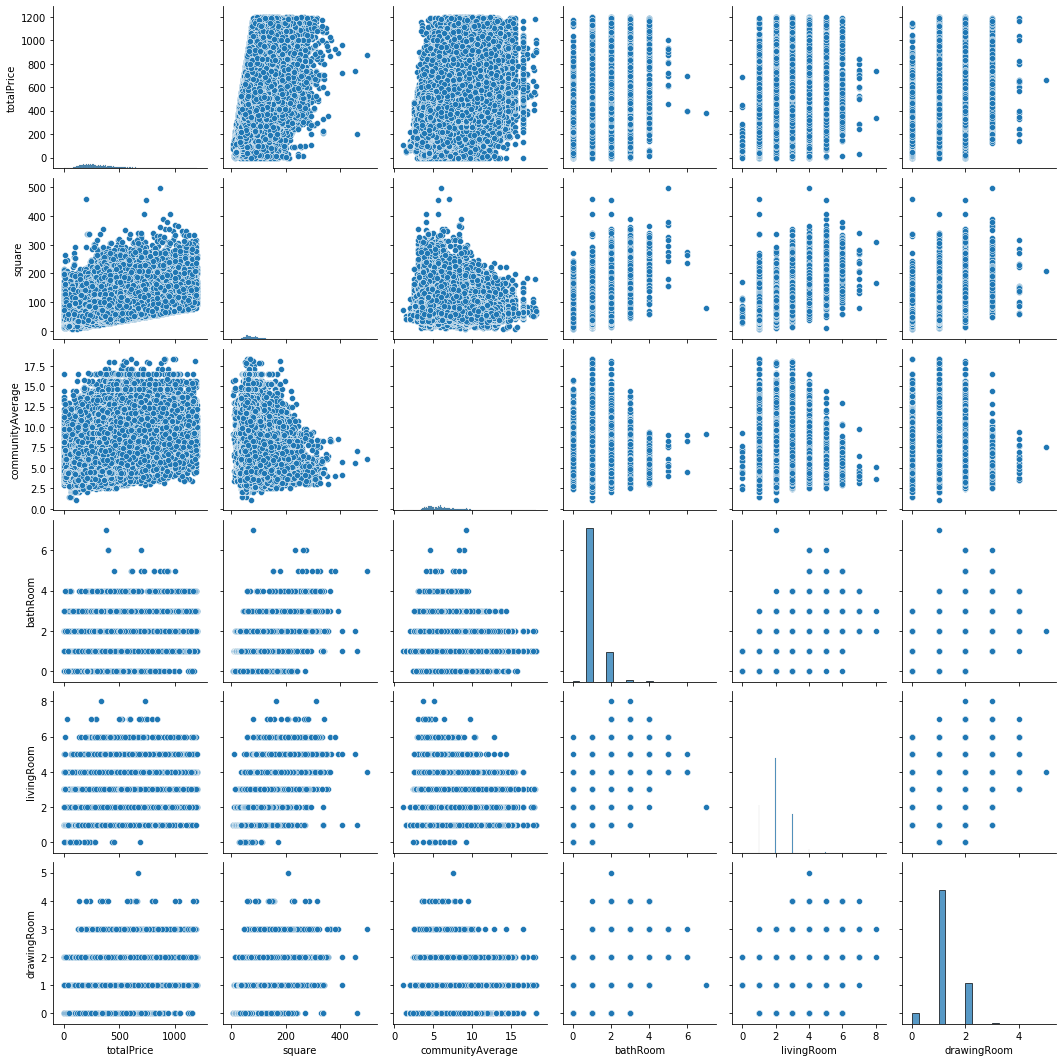

In [ ]:
sns.pairplot(df_sample1)
plt.show()

## 5 타겟변수 및 베이스라인 모델 선정
- 타겟 변수는 주택 총 가격인 totalPrice로 선정했다.

In [ ]:
# 타겟 변수 정의
target = 'totalPrice'

In [ ]:
!pip install fast_ml

     |████████████████████████████████| 42 kB 440 kB/s 


In [ ]:
from fast_ml.model_development import train_valid_test_split

In [ ]:
#데이터셋 분할 (학습/검증/테스트 = 6:2:2)
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'totalPrice', 
                                                                            method='sorted', sort_by_col='tradeTime',
                                                                            train_size=0.6, valid_size=0.2, test_size=0.2)

In [ ]:
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)

(176829, 20) (176829,) (58943, 20) (58943,) (58944, 20) (58944,)


### - 베이스라인 모델 선정 
- 베이스라인 모델은 기준 모델로서 데이터셋의 평균값을 사용하여 만들었다. 또한, 기준 모델과 사용하게되는 모델과의 비교를 통해 최종모델을 선정한다. 

In [ ]:
# baseline model
base_pred = df.totalPrice.mean()
base_pred = [df.totalPrice.mean() for i in range(len(y_train))]
print('baseline MAE : {}'.format(mean_absolute_error(y_train, base_pred)))
print('baseline RMSE : {}'.format(sqrt(mean_squared_error(y_train, base_pred))))
#print('baseline $R^2$ score : {}'.format(r2_score(y_train, base_pred)))

baseline MAE : 131.18309865854843
baseline RMSE : 161.451196559387
baseline $R^2$ score : -0.15295781496487493


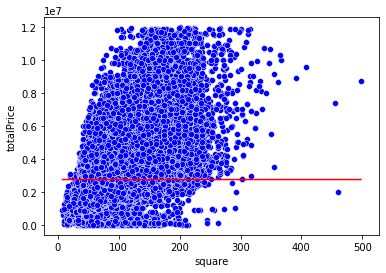

In [ ]:
# 상관 변수가 높은 특성과 타겟의 기준모델
x_base = train['square']
y_base = train['totalPrice']

sns.lineplot(x=x_base, y=base_predict, color='red')
sns.scatterplot(x=x_base, y=y_base, color='blue');

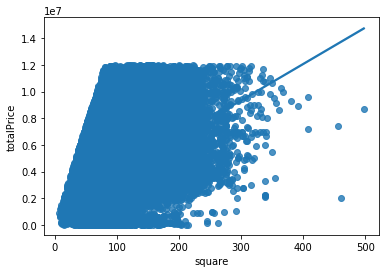

In [ ]:
# Seaborn regplot(회귀선 그래프 시각화) 최소제곱법을 이용한 선형 회귀계수
sns.regplot(x=df['square'], y=df['totalPrice']);

- 선형회귀선에 예측치가 좀 더 밀집한 형태로 변환됐음을 알 수 있다. 

## 6 데이터 모델링 및 모델 해석
- 다양한 회귀모델을 데이터에 적용한 후, 최적의 성능을 보인 모델을 선정함을 목표로 한다. 

In [ ]:
from math import sqrt
# 전처리, 파이프라인 라이브러리
from sklearn import metrics
from sklearn.pipeline import Pipeline, make_pipeline
from category_encoders import OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures #다항 방정식
from sklearn.impute import SimpleImputer

# 모델 지표 및 하이퍼파라미터 튜닝 라이브러리 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LassoCV , ElasticNetCV , RidgeCV
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import PredefinedSplit
from scipy.stats import randint, uniform


# 회귀모델 라이브러리
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRFRegressor
from sklearn.compose import TransformedTargetRegressor


#특성 시각화 라이브러리
import shap
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot
import eli5
from eli5.sklearn import PermutationImportance
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
!pip freeze > requirements.txt

### 모델 1 : 랜덤포레스트 회귀모델

In [ ]:
pipe = Pipeline([('enc', OrdinalEncoder()),
                  ('imp', SimpleImputer()),
                  ('rfr', RandomForestRegressor())])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('enc',
                 OrdinalEncoder(cols=['tradeTime', 'buildingType',
                                      'constructionTime', 'renovationCondition',
                                      'elevator', 'fiveYearsProperty', 'subway',
                                      'district', 'buildingStructure '],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'tradeTime',
                                          'data_type': dtype('O'),
                                          'mapping': 2009    1
2010    2
2011    3
2012    4
2013    5
2...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
 

In [ ]:
train_pred = pipe.predict(X_train)
print('MAE : ', mean_absolute_error(y_train, train_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_train, train_pred)))
print('R2 Score : ', r2_score(y_train, train_pred))

MAE :  9.363198764285945
RMSE :  15.491831705795754
R2 Score :  0.9893845985667952


In [ ]:
y_pred = pipe.predict(X_valid)
print('MAE : ', mean_absolute_error(y_valid, y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_valid, y_pred)))
print('R2 Score : ', r2_score(y_valid, y_pred))

MAE :  54.269817963197696
RMSE :  73.47660425369862
R2 Score :  0.8483530812677035


- 모델 결과 분석 : 랜덤포레스트 모델로 하이퍼파라미터 조정 없이 데이터를 모델링한 결과, r^2값이 1에 수렴하여 지나치게 높은 정확도를 보이고, MAE/RMSE도 검증데이터셋에 적용 시 높아져 과적합의 위험성이 있다. > 하이퍼파라미터 조정을 통해 모델을 개선 시킬 필요성이 있다 .

### 모델 2 : 다중선형회귀모델

In [ ]:
pipe_linear = Pipeline([ #다중선형회귀모델
                ('si', SimpleImputer()),                  
                ('scl', StandardScaler()), 
                ('poly', PolynomialFeatures()),
                 ('fit', LinearRegression())])

In [ ]:
pipe_linear.fit(X_train,y_train)
train_predlinear = pipe_linear.predict(X_train)
y_predlinear = pipe_linear.predict(X_valid)

In [ ]:
print('선형회귀모델')
print('선형회귀모델 학습 데이터셋 MAE : ', mean_absolute_error(y_train, train_predlinear))
print('선형회귀모델 학습 데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_train,train_predlinear)))
print('선형회귀모델 학습 데이터셋 R2 Score : ', r2_score(y_train, train_predlinear))
print('-------------------------------------------------------------------------------------')
print('선형회귀모델 검증 데이터셋 MAE : ', mean_absolute_error(y_valid, y_predlinear))
print('선형회귀모델 검증 데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_valid, y_predlinear)))
print('선형회귀모델 검증 데이터셋 R2 Score : ', r2_score(y_valid, y_predlinear))

선형회귀모델
선형회귀모델 학습 데이터셋 MAE :  33.292791745008486
선형회귀모델 학습 데이터셋 RMSE :  49.672125700829106
선형회귀모델 학습 데이터셋 R2 Score :  0.8908669298441697
-------------------------------------------------------------------------------------
선형회귀모델 검증 데이터셋 MAE :  58.5651451195547
선형회귀모델 검증 데이터셋 RMSE :  84.24774788934457
선형회귀모델 검증 데이터셋 R2 Score :  0.8006335679285701


In [ ]:
pipe_linear = Pipeline([ #다중선형회귀모델(로그변환)
                  ('si', SimpleImputer()),
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', LinearRegression())])

tt_linear = TransformedTargetRegressor(regressor=pipe_linear,
                                func=np.log1p, inverse_func=np.expm1)

In [ ]:
tt_linear.fit(X_train,y_train)
train_predlinear2 = tt_linear.predict(X_train)
y_predlinear2 = tt_linear.predict(X_valid)

In [ ]:
print('로그변환 선형회귀모델')
print('로그 변환 선형회귀모델 학습 데이터셋 MAE : ', mean_absolute_error(y_train, train_predlinear2))
print('로그 변환 선형회귀모델 학습 데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_train,train_predlinear2)))
print('로그 변환 선형회귀모델 학습 데이터셋 R2 Score : ', r2_score(y_train, train_predlinear2))
print('-------------------------------------------------------------------------------------')
print('로그 변환 선형회귀모델 검증 데이터셋 MAE : ', mean_absolute_error(y_valid, y_predlinear2))
print('로그 변환 선형회귀모델 검증 데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_valid, y_predlinear2)))
print('로그 변환 선형회귀모델 검증 데이터셋 R2 Score : ', r2_score(y_valid, y_predlinear2))

로그변환 선형회귀모델
로그 변환 선형회귀모델 학습 데이터셋 MAE :  34.251558552658445
로그 변환 선형회귀모델 학습 데이터셋 RMSE :  53.69213740872415
로그 변환 선형회귀모델 학습 데이터셋 R2 Score :  0.8724876448501379
-------------------------------------------------------------------------------------
로그 변환 선형회귀모델 검증 데이터셋 MAE :  73.82095718564172
로그 변환 선형회귀모델 검증 데이터셋 RMSE :  107.24244974515726
로그 변환 선형회귀모델 검증 데이터셋 R2 Score :  0.6769506374225089


- 로그변환을 한 선형회귀모델을 학습시킨 결과 본 모델보다 성능이 떨어졌다.

### 모델 3 : 라쏘 회귀모델

In [ ]:
pipe_lasso = Pipeline([ #lasso 회귀모델 
                ('si', SimpleImputer()),
                ('scl', StandardScaler()),     
                ('poly', PolynomialFeatures()),
                 ('fit', Lasso(random_state = 42))])

In [ ]:
pipe_lasso.fit(X_train,y_train)
train_predlasso = pipe_lasso.predict(X_train)
y_predlasso = pipe_lasso.predict(X_valid)

In [ ]:
print('라쏘 회귀모델')
print('Lasso회귀모델 학습데이터셋 MAE : ', mean_absolute_error(y_train, train_predlasso))
print('Lasso회귀모델 학습데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_train,train_predlasso)))
print('Lasso회귀모델 학습데이터셋 R2 Score : ', r2_score(y_train, train_predlasso))
print('-------------------------------------------------------------------------------------')
print('Lasso회귀모델 검증데이터셋 MAE : ', mean_absolute_error(y_valid, y_predlasso))
print('Lasso회귀모델 검증데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_valid, y_predlasso)))
print('Lasso회귀모델 검증데이터셋 R2 Score : ', r2_score(y_valid, y_predlasso))

Lasso회귀모델 학습데이터셋 MAE :  34.00599434882849
Lasso회귀모델 학습데이터셋 RMSE :  50.87118140108067
Lasso회귀모델 학습데이터셋 R2 Score :  0.8855345214253367
-------------------------------------------------------------------------------------
Lasso회귀모델 검증데이터셋 MAE :  60.53106545316013
Lasso회귀모델 검증데이터셋 RMSE :  86.3551618568345
Lasso회귀모델 검증데이터셋 R2 Score :  0.7905347225096249


In [ ]:
pipe_lasso = Pipeline([ #lasso 회귀모델(로그변환)
                 ('si', SimpleImputer()),
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Lasso(random_state = 42))])

tt_lasso = TransformedTargetRegressor(regressor=pipe_lasso,
                                func=np.log1p, inverse_func=np.expm1)

In [ ]:
tt_lasso.fit(X_train,y_train)
train_predlasso2 = tt_lasso.predict(X_train)
y_predlasso2 = tt_lasso.predict(X_valid)

In [ ]:
print('로그변환 라쏘회귀모델')
print('Lasso회귀모델 학습데이터셋 MAE : ', mean_absolute_error(y_train, train_predlasso2))
print('Lasso회귀모델 학습데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_train,train_predlasso2)))
print('Lasso회귀모델 학습데이터셋 R2 Score : ', r2_score(y_train, train_predlasso2))
print('-------------------------------------------------------------------------------------')
print('Lasso회귀모델 검증데이터셋 MAE : ', mean_absolute_error(y_valid, y_predlasso2))
print('Lasso회귀모델 검증데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_valid, y_predlasso2)))
print('Lasso회귀모델 검증데이터셋 R2 Score : ', r2_score(y_valid, y_predlasso2))

로그변환 라쏘회귀모델
Lasso회귀모델 학습데이터셋 MAE :  105.14223874250679
Lasso회귀모델 학습데이터셋 RMSE :  154.186363492409
Lasso회귀모델 학습데이터셋 R2 Score :  -0.05153277248680643
-------------------------------------------------------------------------------------
Lasso회귀모델 검증데이터셋 MAE :  158.5551481319408
Lasso회귀모델 검증데이터셋 RMSE :  229.19746194985
Lasso회귀모델 검증데이터셋 R2 Score :  -0.4755537853714149


### 모델 4 : 릿지 회귀모델

In [ ]:
pipe_ridge = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Ridge())])

In [ ]:
pipe_ridge.fit(X_train,y_train)
train_predridge = pipe_ridge.predict(X_train)
y_predridge = pipe_ridge.predict(X_valid)

In [ ]:
print('릿지 회귀모델')
print('Ridge회귀모델 학습데이터셋 MAE : ', mean_absolute_error(y_train, train_predridge))
print('Ridge회귀모델 학습데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_train,train_predridge)))
print('Ridge회귀모델 학습데이터셋 R2 Score : ', r2_score(y_train, train_predridge))
print('-------------------------------------------------------------------------------------')
print('Ridge회귀모델 검증데이터셋 MAE : ', mean_absolute_error(y_valid, y_predridge))
print('Ridge회귀모델 검증데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_valid, y_predridge)))
print('Ridge회귀모델 검증데이터셋 R2 Score : ', r2_score(y_valid, y_predridge))

릿지 회귀모델
Ridge회귀모델 학습데이터셋 MAE :  33.33128109140819
Ridge회귀모델 학습데이터셋 RMSE :  49.72915431884221
Ridge회귀모델 학습데이터셋 R2 Score :  0.8906161944143691
-------------------------------------------------------------------------------------
Ridge회귀모델 검증데이터셋 MAE :  58.64646976494929
Ridge회귀모델 검증데이터셋 RMSE :  84.45004554095902
Ridge회귀모델 검증데이터셋 R2 Score :  0.7996749717801512


### 모델 5 : GradientBoosting 회귀모델

In [ ]:
pipe_gbr = Pipeline([ #GBR 회귀모델 
                ('si', SimpleImputer()),
                ('scl', StandardScaler()),
                 ('poly', PolynomialFeatures()), #적용할 경우 시간 소모가 크다...
                 ('fit', GradientBoostingRegressor())])

In [ ]:
pipe_gbr.fit(X_train,y_train)
train_predgbr = pipe_gbr.predict(X_train)
y_predgbr = pipe_gbr.predict(X_valid)

In [ ]:
print('GBR회귀모델 학습데이터셋 MAE : ', mean_absolute_error(y_train, train_predgbr))
print('GBR회귀모델 학습데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_train,train_predgbr)))
print('GBR회귀모델 학습데이터셋 R2 Score : ', r2_score(y_train, train_predgbr))
print('-------------------------------------------------------------------------------------')
print('GBR회귀모델 검증데이터셋 MAE : ', mean_absolute_error(y_valid, y_predgbr))
print('GBR회귀모델 검증데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_valid, y_predgbr)))
print('GBR회귀모델 검증데이터셋 R2 Score : ', r2_score(y_valid, y_predgbr))

GBR회귀모델 학습데이터셋 MAE :  30.145950094868297
GBR회귀모델 학습데이터셋 RMSE :  45.81550388326103
GBR회귀모델 학습데이터셋 R2 Score :  0.907155578192075
-------------------------------------------------------------------------------------
GBR회귀모델 검증데이터셋 MAE :  51.00367038920483
GBR회귀모델 검증데이터셋 RMSE :  68.80299851535182
GBR회귀모델 검증데이터셋 R2 Score :  0.8670310718999694


### 모델 6 : AdaBoost 회귀모델

In [ ]:
pipe_ada = Pipeline([ #ADA 회귀모델
                ('si', SimpleImputer()),
                ('scl', StandardScaler()),
                 ('fit', AdaBoostRegressor())])

In [ ]:
pipe_ada.fit(X_train,y_train)
train_predada = pipe_ada.predict(X_train)
y_predada = pipe_ada.predict(X_valid)

In [ ]:
print('ADA회귀모델 학습데이터셋 MAE : ', mean_absolute_error(y_train, train_predada))
print('ADA회귀모델 학습데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_train,train_predada)))
print('ADA회귀모델 학습데이터셋 R2 Score : ', r2_score(y_train, train_predada))
print('-------------------------------------------------------------------------------------')
print('ADA회귀모델 검증데이터셋 MAE : ', mean_absolute_error(y_valid, y_predada))
print('ADA회귀모델 검증데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_valid, y_predada)))
print('ADA회귀모델 검증데이터셋 R2 Score : ', r2_score(y_valid, y_predada))

ADA회귀모델 학습데이터셋 MAE :  81.24389565338802
ADA회귀모델 학습데이터셋 RMSE :  98.86258583395924
ADA회귀모델 학습데이터셋 R2 Score :  0.5676904668855107
-------------------------------------------------------------------------------------
ADA회귀모델 검증데이터셋 MAE :  82.34419766557657
ADA회귀모델 검증데이터셋 RMSE :  105.9866000655955
ADA회귀모델 검증데이터셋 R2 Score :  0.6844723973362254


### 모델 7 : XGBoost 회귀모델

In [ ]:
pipe_xgb = Pipeline([ #XGB 회귀모델
                ('si', SimpleImputer()),
                ('scl', StandardScaler()),
                 ('fit', XGBRFRegressor())])

In [ ]:
pipe_xgb.fit(X_train,y_train)
train_predxgb = pipe_xgb.predict(X_train)
y_predxgb = pipe_xgb.predict(X_valid)

[05:45:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print('XGB회귀모델 학습데이터셋 MAE : ', mean_absolute_error(y_train, train_predxgb))
print('XGB회귀모델 학습데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_train,train_predxgb)))
print('XGB회귀모델 학습데이터셋 R2 Score : ', r2_score(y_train, train_predxgb))
print('-------------------------------------------------------------------------------------')
print('XGB회귀모델 검증데이터셋 MAE : ', mean_absolute_error(y_valid, y_predxgb))
print('XGB회귀모델 검증데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_valid, y_predxgb)))
print('XGB회귀모델 검증데이터셋 R2 Score : ', r2_score(y_valid, y_predxgb))

XGB회귀모델 학습데이터셋 MAE :  62.11563162247099
XGB회귀모델 학습데이터셋 RMSE :  88.1808882724066
XGB회귀모델 학습데이터셋 R2 Score :  0.6560622705496718
-------------------------------------------------------------------------------------
XGB회귀모델 검증데이터셋 MAE :  110.9134029265657
XGB회귀모델 검증데이터셋 RMSE :  153.02513137127966
XGB회귀모델 검증데이터셋 R2 Score :  0.3422498460597613


### - 모델 해석

- 기본 회귀모델 분석 결과 : 최적의 모델 선정 전, 기본 7종의 회귀모델(랜덤포레스트, 다중선형, 릿지, 라쏘, , GBR, 에이다, XGB)을 통해 데이터를 학습시킨 결과, 랜덤포레스트모델보다 성능이 기본적으로 좋았으며 그 중에서도 릿지회귀모델, GBR모델의 모델 지표 점수가 좋았기 때문에 이 두 모델의 하이퍼파라미터 조정을 통해 모델의 성능을 개선시킬 필요가 있다는 인사이트를 얻었다. 그리고 로그변환을 한 모델의 성능이 기본 모델보다 떨어졌으므로 해당 모델을 제외하고 진행해야한다고  판단했다.

## 하이퍼파라미터 튜닝 및 최적의 모델 선정
(선정 모델 : 릿지모델, GradientBoostingRegressor 모델) cf) 
부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치를 부여해 오류를 개선해나가며 학습하는 방식

In [ ]:
# 모델1 릿지모델
cv = ShuffleSplit(n_splits=5 , test_size=0.3, random_state=42) 
pipe_ridge = Pipeline([ #Ridge 회귀모델
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Ridge())
                 ])

# 튜닝할 하이퍼파라미터의 범위 지정 
dists = [{
    "poly__degree" : np.arange(1,3),
    "fit__alpha" : np.linspace(2,5,10) ,
    "fit__solver" : [ "cholesky","lsqr","sparse_cg"] ,
    "fit__tol" : np.logspace(-5,0,10) ,
                     }]

clf_ridge = RandomizedSearchCV(
    pipe_ridge, 
    param_distributions = dists, 
    n_iter = 50, 
    cv = cv,
    scoring = 'neg_mean_absolute_error',
    verbose = 1,
    n_jobs = -1
)

In [ ]:
clf_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.9min finished


RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.3, train_size=None),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scl',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('poly',
                                              PolynomialFeatures(degree=2,
                                                                 include_bias=True,
                                                                 interaction_only=False,
                                                                 order='C')),
                                             ('fit',
                                              Ridge(alpha=1.0, copy_X=True,
                           

In [ ]:
print('Ridge 최적 하이퍼파라미터: ', clf_ridge.best_params_)
print('Ridge MAE: ', -clf_ridge.best_score_)

Ridge 최적 하이퍼파라미터:  {'poly__degree': 1, 'fit__tol': 0.021544346900318846, 'fit__solver': 'sparse_cg', 'fit__alpha': 3.6666666666666665}
Ridge MAE:  1325.2861686231015


In [ ]:
# 수정된 릿지 모델 
pipe_ridgemodify = clf_ridge.best_estimator_

In [ ]:
train_predridgemodify = pipe_ridgemodify.predict(X_train)
y_predridgemodify = pipe_ridgemodify.predict(X_valid)

In [ ]:
print('수정된 릿지 회귀모델')
print('수정된 Ridge회귀모델 학습데이터셋 MAE : ', mean_absolute_error(y_train, train_predridgemodify))
print('수정된 Ridge회귀모델 학습데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_train,train_predridgemodify)))
print('수정된 Ridge회귀모델 학습데이터셋 R2 Score : ', r2_score(y_train, train_predridgemodify))
print('-------------------------------------------------------------------------------------')
print('수정된 Ridge회귀모델 검증데이터셋 MAE : ', mean_absolute_error(y_valid, y_predridgemodify))
print('수정된 Ridge회귀모델 검증데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_valid, y_predridgemodify)))
print('수정된 Ridge회귀모델 검증데이터셋 R2 Score : ', r2_score(y_valid, y_predridgemodify))

수정된 릿지 회귀모델
수정된 Ridge회귀모델 학습데이터셋 MAE :  48.006521695808985
수정된 Ridge회귀모델 학습데이터셋 RMSE :  69.21142061704121
수정된 Ridge회귀모델 학습데이터셋 R2 Score :  0.7881217347893814
-------------------------------------------------------------------------------------
수정된 Ridge회귀모델 검증데이터셋 MAE :  69.72468119447528
수정된 Ridge회귀모델 검증데이터셋 RMSE :  103.65881652338092
수정된 Ridge회귀모델 검증데이터셋 R2 Score :  0.6981800597953562


In [ ]:
# 모델2 GBR모델
cv = ShuffleSplit(n_splits=5 , test_size=0.3, random_state=42)

pipe_gbr = Pipeline([ #GBR 회귀모델 
                ('si', SimpleImputer()),
                ('scl', StandardScaler()),
                 ('fit', GradientBoostingRegressor())])

# 튜닝할 하이퍼파라미터 범위를 지정
dists = [{
    "fit__n_estimators" : randint(478, 480),
    "fit__max_features" : ["sqrt", "log2"],
    "fit__loss" : ["ls","lad","huber"], 
    "fit__max_depth" : [7,8],
    'fit__min_samples_split': randint(1,3)
}]

clf_gbr = RandomizedSearchCV(
    pipe_gbr, 
    param_distributions = dists, 
    n_iter = 50, 
    cv = cv,
    scoring = 'neg_mean_absolute_error',
    verbose = 1,
    n_jobs = -1
) #200분.................?

In [ ]:
clf_gbr.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 139.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 192.5min finished


RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.3, train_size=None),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('si',
                                              SimpleImputer(add_indicator=False,
                                                            copy=True,
                                                            fill_value=None,
                                                            missing_values=nan,
                                                            strategy='mean',
                                                            verbose=0)),
                                             ('scl',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                         

In [ ]:
print('GBR 최적 하이퍼파라미터: ', clf_gbr.best_params_)
print('GBR MAE: ', -clf_gbr.best_score_)

GBR 최적 하이퍼파라미터:  {'fit__loss': 'huber', 'fit__max_depth': 8, 'fit__max_features': 'log2', 'fit__min_samples_split': 2, 'fit__n_estimators': 479}
GBR MAE:  24.570266777674956


In [ ]:
# 수정된 GBR 모델 
pipe_gbrmodify = clf_gbr.best_estimator_

In [ ]:
train_predgbrmodify = pipe_gbrmodify.predict(X_train)
y_predgbrmodify = pipe_gbrmodify.predict(X_valid)

In [ ]:
print('최종 GBR 회귀모델')
print('최종 GBR회귀모델 학습데이터셋 MAE : ', mean_absolute_error(y_train, train_predgbrmodify))
print('최종 GBR회귀모델 학습데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_train,train_predgbrmodify)))
print('최종 GBR회귀모델 학습데이터셋 R2 Score : ', r2_score(y_train, train_predgbrmodify))
print('-------------------------------------------------------------------------------------')
print('최종 GBR회귀모델 검증데이터셋 MAE : ', mean_absolute_error(y_valid, y_predgbrmodify))
print('최종 GBR회귀모델 검증데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_valid, y_predgbrmodify)))
print('최종 GBR회귀모델 검증데이터셋 R2 Score : ', r2_score(y_valid, y_predgbrmodify))

최종 GBR 회귀모델
최종 GBR회귀모델 학습데이터셋 MAE :  20.68619583415794
최종 GBR회귀모델 학습데이터셋 RMSE :  33.156374002694584
최종 GBR회귀모델 학습데이터셋 R2 Score :  0.9513744036124538
-------------------------------------------------------------------------------------
최종 GBR회귀모델 검증데이터셋 MAE :  47.54924681807521
최종 GBR회귀모델 검증데이터셋 RMSE :  64.33990907362772
최종 GBR회귀모델 검증데이터셋 R2 Score :  0.8837223296474156


In [ ]:
print('기준 GBR회귀모델 학습데이터셋 MAE : ', mean_absolute_error(y_train, train_predgbr))
print('기준 GBR회귀모델 학습데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_train,train_predgbr)))
print('기준 GBR회귀모델 학습데이터셋 R2 Score : ', r2_score(y_train, train_predgbr))
print('-------------------------------------------------------------------------------------')
print('기준 회귀모델 검증데이터셋 MAE : ', mean_absolute_error(y_valid, y_predgbr))
print('기준 회귀모델 검증데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_valid, y_predgbr)))
print('기준 회귀모델 검증데이터셋 R2 Score : ', r2_score(y_valid, y_predgbr))

기준 GBR회귀모델 학습데이터셋 MAE :  30.14595009486834
기준 GBR회귀모델 학습데이터셋 RMSE :  45.815503883261066
기준 GBR회귀모델 학습데이터셋 R2 Score :  0.9071555781920749
-------------------------------------------------------------------------------------
기준 회귀모델 검증데이터셋 MAE :  50.999840351792066
기준 회귀모델 검증데이터셋 RMSE :  68.80839962865566
기준 회귀모델 검증데이터셋 R2 Score :  0.8670101946576678


- GBR 하이퍼파라미터 참고

loss{‘ls’, ‘lad’, ‘huber’, ‘quantile’}, default=’ls’
Loss function to be optimized. ‘ls’ refers to least squares regression. ‘lad’ (least absolute deviation) is a highly robust loss function solely based on order information of the input variables. ‘huber’ is a combination of the two. ‘quantile’ allows quantile regression (use alpha to specify the quantile).

## 7 최종 모델 선정 및 결론 도출 

- 하이퍼파라미터 튜닝 결과 분석 : 모델링으로 사용한 릿지, GBR 회귀모델을 각각 튜닝한 결과, 릿지모델의 경우 오히려 성능 저하가 발생했다. 하지만 GBR 회귀모델의 경우 지표값이 좋아졌음을 알 수 있다. 결론적으로 최종 모델 선정은 GBR 회귀모델로 정했다.

In [ ]:
#최종모델 테스트셋 예측
y_predfinal = pipe_gbrmodify.predict(X_test)

In [ ]:
print('최종모델 적용 테스트 지표값 확인')
print('최종 GBR회귀모델 테스트데이터셋 MAE : ', mean_absolute_error(y_test, y_predfinal))
print('최종 GBR회귀모델 테스트데이터셋 RMSE : ', np.sqrt(mean_squared_error(y_test, y_predfinal)))
print('최종 GBR회귀모델 테스트데이터셋 R2 Score : ', r2_score(y_test, y_predfinal))

최종모델 적용 테스트 지표값 확인
최종 GBR회귀모델 테스트데이터셋 MAE :  102.45717046954115
최종 GBR회귀모델 테스트데이터셋 RMSE :  122.09552862680415
최종 GBR회귀모델 테스트데이터셋 R2 Score :  0.6209109086870994


- 기준모델 평가 지표
baseline MAE : 131.18309865854843
baseline RMSE : 161.451196559387
<br>
GBR 최적 하이퍼파라미터:  {'fit__loss': 'huber', 'fit__max_depth': 8, 'fit__max_features': 'log2', 'fit__min_samples_split': 2, 'fit__n_estimators': 479}

### - 최종 모델링 결과 분석 시각화

In [ ]:
pipe_gbr = Pipeline([ #GBR 회귀모델 
                ('si', SimpleImputer()),
                ('scl', StandardScaler()),
                 ('fit', GradientBoostingRegressor(loss='huber', max_depth=8, max_features='log2', min_samples_leaf=2, n_estimators=479))])

In [ ]:
train_predgbrmodify = pipe_gbr.predict(X_train)
y_predgbrmodify = pipe_gbr.predict(X_valid)

In [ ]:
model =  pipe_gbr

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


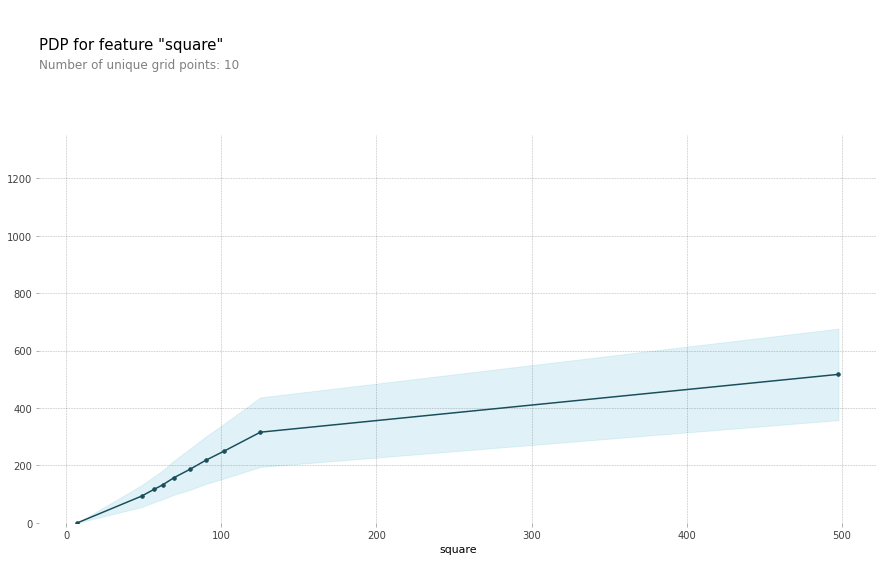

In [ ]:
shap.initjs();

feature = 'square'
isolated = pdp_isolate(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile', 
    num_grid_points=10 
)
pdp_plot(isolated, feature_name=feature);

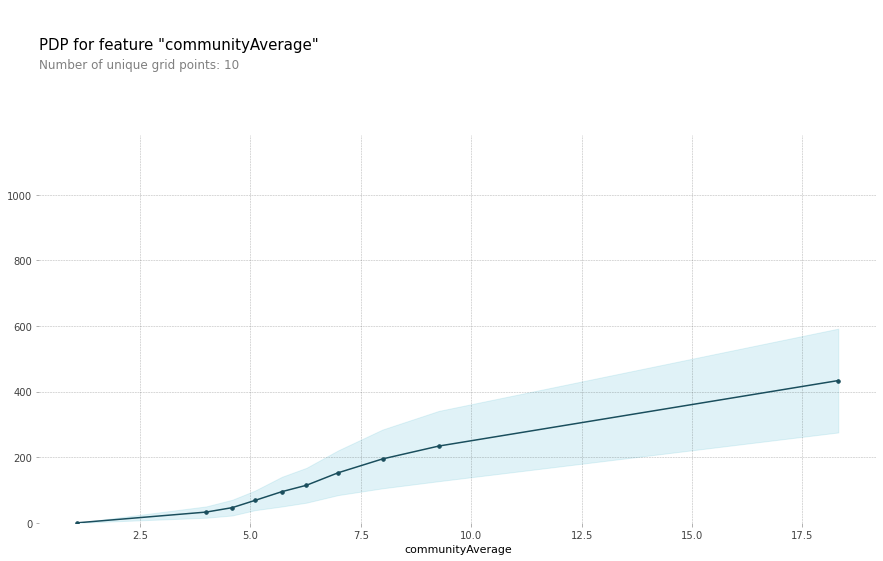

In [ ]:
feature = 'communityAverage'
isolated = pdp_isolate(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile',
    num_grid_points=10 
)
pdp_plot(isolated, feature_name=feature);

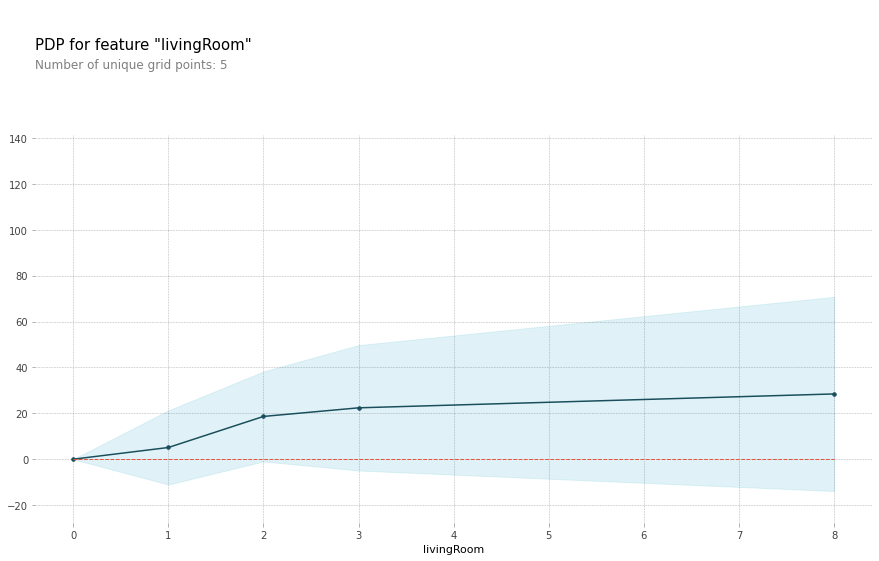

In [ ]:
feature = 'livingRoom'
isolated = pdp_isolate(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile',
    num_grid_points=10 
)
pdp_plot(isolated, feature_name=feature);

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


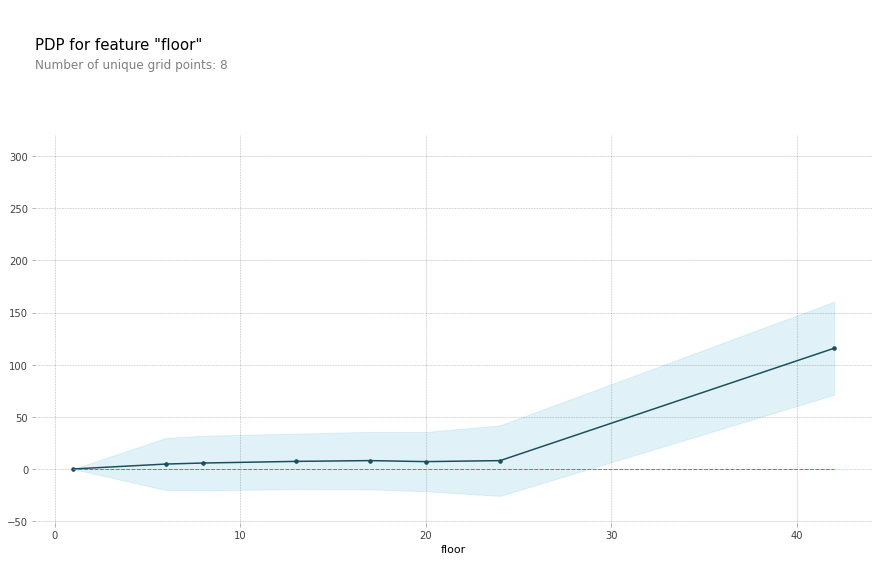

In [ ]:
feature = 'floor'
isolated = pdp_isolate(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile',
    num_grid_points=10 
)
pdp_plot(isolated, feature_name=feature);

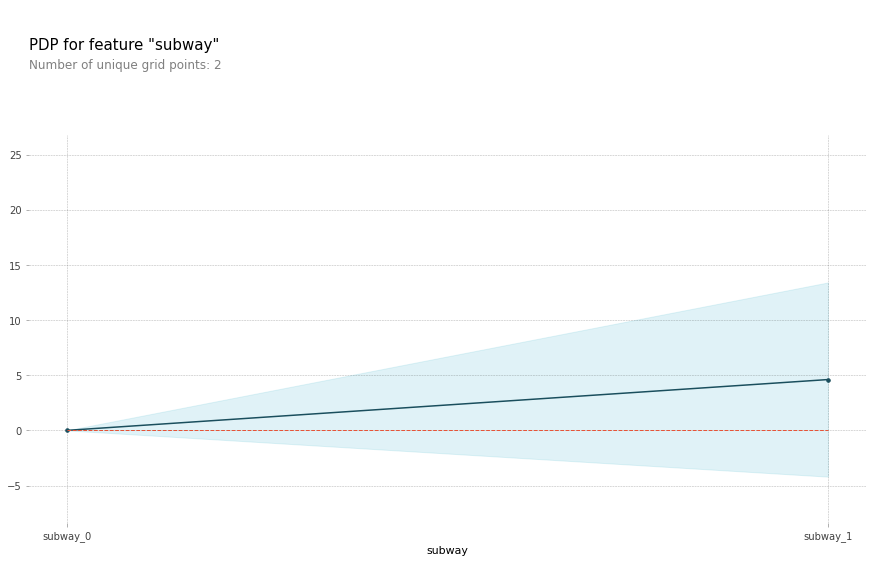

In [ ]:
feature = 'subway'
isolated = pdp_isolate(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile',
    num_grid_points=10 
)
pdp_plot(isolated, feature_name=feature);

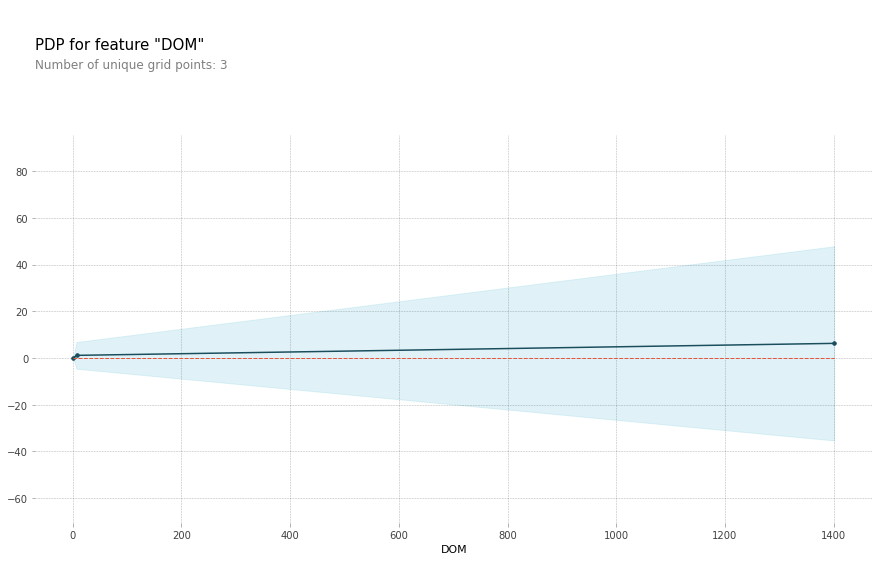

In [ ]:
feature = 'DOM'
isolated = pdp_isolate(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile',
    num_grid_points=10 
)
pdp_plot(isolated, feature_name=feature);

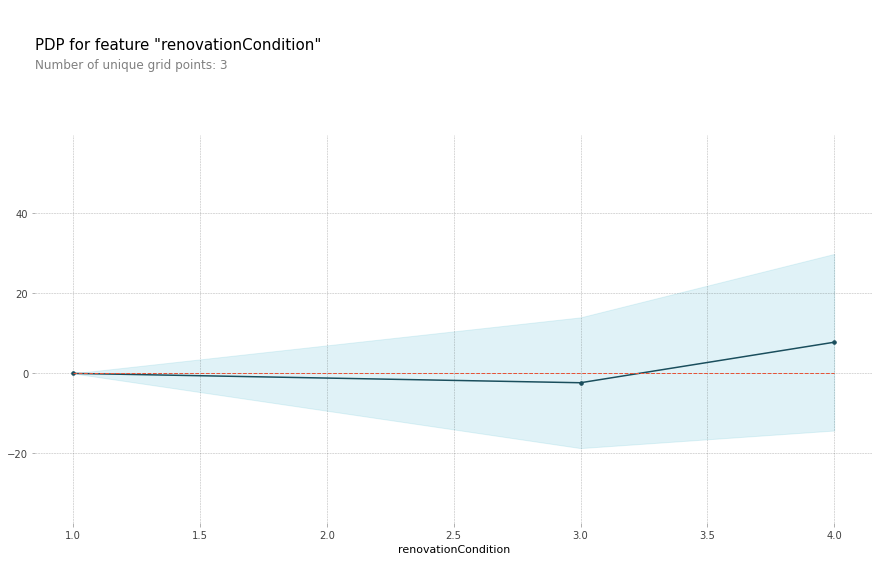

In [ ]:
feature = 'renovationCondition'
isolated = pdp_isolate(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile',
    num_grid_points=10 
)
pdp_plot(isolated, feature_name=feature);

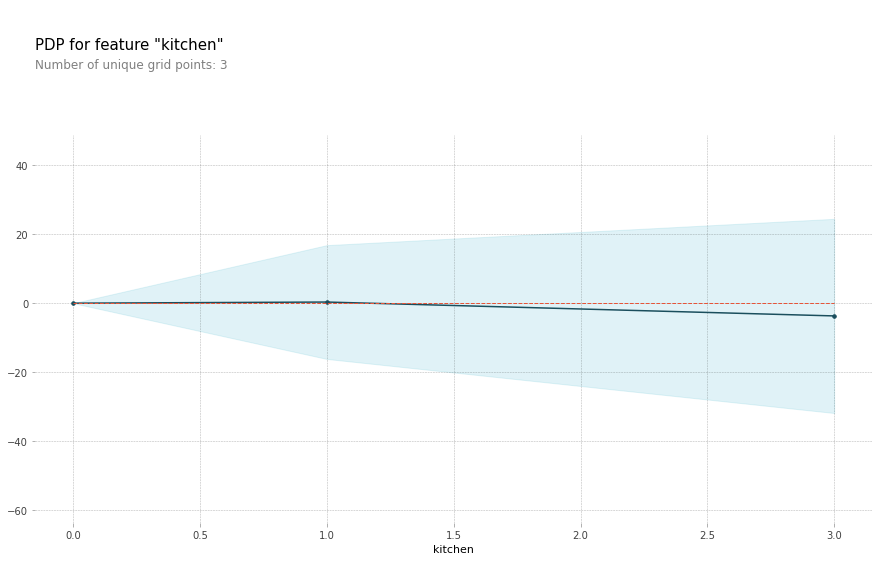

In [ ]:
feature = 'kitchen'
isolated = pdp_isolate(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile',
    num_grid_points=10 
)
pdp_plot(isolated, feature_name=feature);

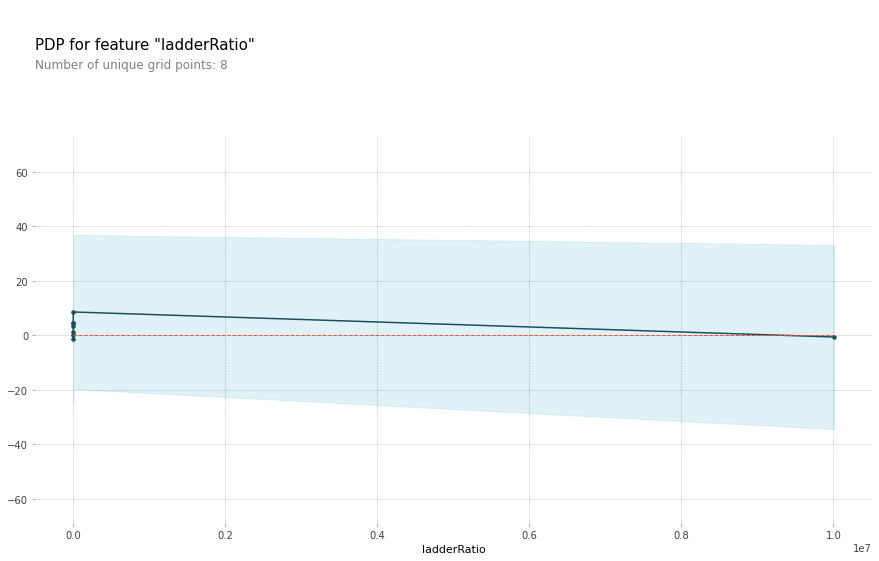

In [ ]:
feature = 'ladderRatio'
isolated = pdp_isolate(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile',
    num_grid_points=10 
)
pdp_plot(isolated, feature_name=feature);

### 변수 중요도
타겟변수에 가장 영향력이 있는 변수를 순차적으로 시각화함

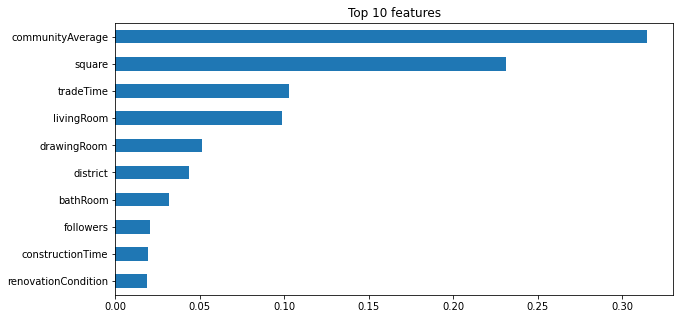

In [ ]:
GBR = pipe_gbrmodify.named_steps['fit']
importances = pd.Series(GBR.feature_importances_, X_train.columns)

n = 10
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

### 실제 데이터 예측

In [ ]:
#테스트값 확인
row = X_test.iloc[[513]]  
row

,tradeTime,DOM,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,buildingStructure
201340,2016,43.0,15,54.94,1,0,1,1,21,3,2008,4,6,0.19,1,1,0,7,7.2269,6


In [ ]:
y_test.iloc[[513]]

201340    365.0
Name: totalPrice, dtype: float64

In [ ]:
model.predict(row)

array([298.31962733])

무작위로 선택한 2006년의 데이터 값을 최종 모델을 통해 예측한 결과, 예측 가격과 실제 가격의 오차는 약 67만 위안 정도의 오차를 보였고, 이는  최종모델의 테스트셋 평가지표 MAE (110.59944007131833/110만 위안)의 범위 안에서 예측했다.